# Discrete Distribution

## Random Variable and Probability Distribution

Suppose that Peter and Paul play a simple coin game. A coin is tossed. If the coin lands heads, then Peter receives \\$2 from Paul; otherwise Peter has to pay \\$2 to Paul. The game is played for a total of five coin flips. After the five flips, what is Peter’s net gain (in dollars)?

The answer depends on the results of the coin flips. There are two possible outcomes of each coin flip (heads or tails) and, by applying the multiplication rule, there are $2^5 = 32$ possibilities for the five flips. The 32 possible outcomes
are written below.

In [1]:
import itertools
import numpy as np
import pandas as pd

a1 = np.array([''.join(x) for x in itertools.product('HT', repeat=5)]).reshape(8,4)
df1 = pd.DataFrame(np.array([''.join(x) for x in itertools.product('HT', repeat=5)]).reshape(8,4))

#2*a1[0,0].count('H') - 2*a1[0,0].count('T')
df1

,0,1,2,3
0,HHHHH,HHHHT,HHHTH,HHHTT
1,HHTHH,HHTHT,HHTTH,HHTTT
2,HTHHH,HTHHT,HTHTH,HTHTT
3,HTTHH,HTTHT,HTTTH,HTTTT
4,THHHH,THHHT,THHTH,THHTT
5,THTHH,THTHT,THTTH,THTTT
6,TTHHH,TTHHT,TTHTH,TTHTT
7,TTTHH,TTTHT,TTTTH,TTTTT


For each possible outcome of the flips, say $HTHHT$, there will be a corresponding net gain for Peter. For this outcome, Peter won three times and lost twice, so his net gain is $3(2)−2(2) = 2$ dollars. The net gain is an example of a random variable – this is simply a number that is assigned to each outcome of the random experiment.

Generally, a capital letter will be used to represent a random variable – here the capital letter $G$ denotes Peter’s gain in this experiment. For each of the 32 outcomes, one can assign a value of $G$ – this is done in the next table 

In [2]:
count_revenue = lambda i: 2*i.count('H') - 2*i.count('T')
vectorize_count_revenue = np.vectorize(count_revenue)

# pd.DataFrame(vectorize_count_revenue(a1))

format_rev = lambda i: i + ", G = " + str(vectorize_count_revenue(i))
vectorize_format_rev = np.vectorize(format_rev)

pd.DataFrame(vectorize_format_rev(a1))   

,0,1,2,3
0,"HHHHH, G = 10","HHHHT, G = 6","HHHTH, G = 6","HHHTT, G = 2"
1,"HHTHH, G = 6","HHTHT, G = 2","HHTTH, G = 2","HHTTT, G = -2"
2,"HTHHH, G = 6","HTHHT, G = 2","HTHTH, G = 2","HTHTT, G = -2"
3,"HTTHH, G = 2","HTTHT, G = -2","HTTTH, G = -2","HTTTT, G = -6"
4,"THHHH, G = 6","THHHT, G = 2","THHTH, G = 2","THHTT, G = -2"
5,"THTHH, G = 2","THTHT, G = -2","THTTH, G = -2","THTTT, G = -6"
6,"TTHHH, G = 2","TTHHT, G = -2","TTHTH, G = -2","TTHTT, G = -6"
7,"TTTHH, G = -2","TTTHT, G = -6","TTTTH, G = -6","TTTTT, G = -10"


It is seen from the table that the possible gains for Peter are -10, -6, -2, 2, 6, and 10 dollars. One is interested in the probability that Peter will get each possible gain. To do this, one puts all of the possible values of the random variable in a table. Although a capital letter will be used to denote a random variable, a small letter will denote a specific value of the random variable. So $g$ refers to one specific value of the gain $G$, and $P(G=g)$ refers to the corresponding probability.

| Gain $g$ (dollars) | Number of outcomes | probability $P(G=g)$|
|:----:|:----:|:----:|
|-10|||
|-6|||
|-2|||
|2|||
|6|||
|10|||


> What is the probability that Peter gains \\$6 in this game?

Looking at the table of outcomes, one sees that Peter won \\$6 in five of the outcomes. Since there are 32 possible outcomes of the five flips, and each outcome has the same probability, one sees that the probability of Peter winning \\$6 is $5/32$.

This process is continued for all of the possible values of $G$. In the next table, one places the number of outcomes for each value and the corresponding probability. This is an example of a probability distribution for $G$ – This is simply a list of all possible values for a random variable together with the associated probabilities.

| Gain $g$ (dollars) | Number of outcomes | probability $P(G=g)$ |
| ---- | ---- | ---- |
|-10 | 1 | 1/32|
|-6|5|5/32|
|-2|10|10/32|
|2|10|10/32|
|6|5|5/32|
|10|1|1/32|

#### Probability distribution

In general, suppose $X$ is a discrete random variable. This type of random variable only assigns probability to a discrete set of values. In other words, the support of $X$ is a set of discrete values. The function $f(x)$ is a **probability mass function (pmf)** for $X$ if the function satisfies two properties:

1. $f(x)>0$ for each possible value $x$ of $X$
2. $\sum_{x}f(x) = 1$

The table of values of the gain $G$ and the associated probabilities $f(g) = P(G = g)$ do satisfy these two properties. Each of the assigned probabilities is positive, so property (1) is satisfied. If one sums the assigned probabilities, one finds

$$ \sum_{g}P(G = g) = \frac{1}{32} + \frac{5}{32} + \frac{10}{32}+ \frac{10}{32} + \frac{5}{32} + \frac{1}{32}$$

A probability distribution is a listing of the values of $X$ together with the associated values of the pmf. One graphically displays this probability distribution with a bar graph. One places all of the values of G on the horizontal axis, marks off a probability scale on the vertical scale, and then draws vertical lines on the graph corresponding to the pmf values.

##### Simulating the Peter-Paul Game (in Python)

This version for simulating the Peter-Paul game makes use of a function called `one_play()` which will play the game one time. The `numpy` `random.choice` function is used to flip a coin five times and the function returns the net gain for Paul. In this simulation 

In [3]:
import numpy as np

int_to_coin = lambda i: 'H' if i == 1 else 'T'

def one_play():
    flips = ''.join(np.random.choice(['H','T'], size = 5))
    return(2*flips.count('H') - 2*flips.count('T'))

In [4]:
a = one_play()
a

-2

In [5]:
n_games = 50000

g = np.array([one_play() for _ in np.arange(n_games)])

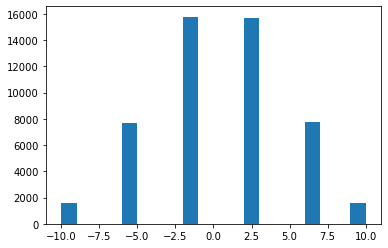

In [6]:
import matplotlib.pyplot as plt

plt.hist(g, bins=np.arange(g.min(), g.max()+1));

In [7]:
unique, counts = np.unique(g, return_counts=True)
table = pd.DataFrame({'gain' : unique,
             'counts': counts})

table.set_index('gain', inplace=True)
table

,counts
gain,
-10,1554
-6,7655
-2,15774
2,15691
6,7740
10,1586


In [8]:
table['perc'] = table['counts']/table['counts'].sum()

In [9]:
table['prob'] = np.array([1/32,5/32,10/32,
                         10/32,5/32,1/32])


In [10]:
table

,counts,perc,prob
gain,,,
-10,1554,0.03108,0.03125
-6,7655,0.15310,0.15625
-2,15774,0.31548,0.31250
2,15691,0.31382,0.31250
6,7740,0.15480,0.15625
10,1586,0.03172,0.03125


<AxesSubplot:xlabel='gain', ylabel='counts'>

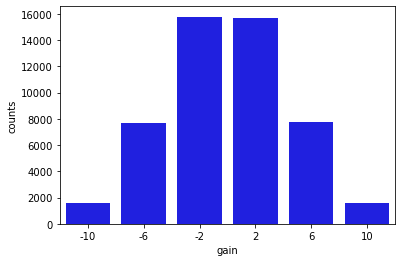

In [11]:
import seaborn as sns

sns.barplot(table.index,
           table['counts'],
           color= 'blue')

### Summarising a Probability Distribution

Once we have constructed a probability distribution – like was one above – it is convenient to use this to find probabilities.

> What is the chance that Peter will win at least \\$5 in this game? 

Looking at the probability table, ones sees that winning “at least \\$5” includes the possible values:

$$ G = 6 \text{ and } G = 10$$

One finds the probability of interest by adding the probabilities of the individual values.

$$
\begin{align*} 
P(G \geq 5) &= P(G = 6 \text{ or } G = 10) \\ 
&= P(G=6) + P(G = 10)\\
&= \frac{5+1}{32} = \frac{6}{32}\\
\end{align*}
$$

What is the probability Peter wins money in this game? Peter wins money if the gain $G$ is positive and this corresponds to the values $G = 2,6,10$. By adding up the probabilities of these three values, one sees the probability that Peter wins money is:

$$
\begin{align*} 
P(\text{Peter wins}) &= P(G \gt 0) \\ 
&= P(G=2) + P(G=2) + P(G = 10)\\
&= \frac{10+5+1}{32} = \frac{1}{2}\\
\end{align*}
$$

It is easy to compute the probability Peter loses money – also $1/2$. Since the probability Peter wins in the game is the same as the probability he loses, the game is clearly fair.

When one has a distribution of data, it is helpful to summarize the data with a single number, such as median or mean, to get some understanding about a typical data value. In a similar fashion, it is helpful to compute an "average" of a probability distribution – this will give us some feeling about typical or representative values of the random variable when one observes it
repeated times.

A common measure of "average" is the ***mean*** or ***expected value*** of $X$, denoted $\mu$ or $E(X)$. The mean (or expected value) is found by:

1. Computing the product of a value of $X$ and the corresponding value of the pmf f(x) = P(X = x) for all values of X.
2. Summing the products.

In other words, one finds the mean by the formula:

$$ \mu = \sum_{x} xf(x)$$

In the Peter-Paul case, for each value of the gain $G$, the value is multiplied by the associated probability. Then the products are added – one sees that the mean of $G$ is $\mu = 0$

How does one interpret a mean value of 0? Actually it is interesting to note that $G = 0$ is not a possible outcome of the game – that is, Peter cannot break even when this game is played. But if Peter and Paul play this game a large number of times, then the value $\mu = 0$ represents (approximately) the mean winnings of Peter in all of these games.

#### Simulating  the Peter-Paul Game (continued)

We previously simulated 5000 outcomes of the game in Python and Peter's winnings were stored in the $g$ numpy array. Here is a display of Peter’s winnings in the first 100 games:

In [12]:
g[:100]

array([ -2,   2,   2,   2,   6,   2,  -2,  -2,   6,   2,   6,  -2,   2,
        -2,  -2,   6,   6,  -6,   6,  -2,   6,   6,  -2,   2,   6,  -6,
        -2,   2,  -2,  -6,   6,  -6,   6,  -6,  -6,  -2,  -2,   2,   2,
        -2,   2,  -2,  -2,   2,  -6,   2,   2,  -2,  -2,  -2,  -6, -10,
         2,  -6,  -6,  -2,  -2,  -2,   6,  -2,   2,  -2,  -6,  -6,   2,
        -6,  -6,  -6,  -6,   2,   2,  -2,   6,  -2,   2,  -6, -10,   2,
        -2,   2,   6,   6,   6,   6,   6,  -2,   6,   2,   2,  -2,  -2,
         2,   6,   6,   2,   2,  -6,   6,   2,  -2])

One approximates the mean winning µ by finding the sample mean $g$ of the winning values in the 1000 simulated games.

In [13]:
g.mean()

0.01328

This value is approximately equal to the mean of $G$, $\mu= 0$. If Peter was able to play this game for a much larger number of games, then one would see that his average winning would be very close to $\mu = 0$.

## Standard Deviation of a Probability Distribution

Consider two dice – one we will call the “fair die” and the other one will be called the “loaded die”. The fair die is the familiar one where each possible number (1 through 6) has the same chance of being rolled. The loaded die is designed in a special way that 3’s or 4’s are relatively likely to occur, and the remaining numbers (1, 2, 5, and 6) are unlikely to occur


| Roll fair | Probability fair | Roll loaded | Probability loaded|
| ---- | ------------ | ----- | ----------- |
| 1 | 1/6 | 1 | 1/12 |
| 2 | 1/6 | 2 | 1/12 |
| 3 | 1/6 | 3 | 1/3 |
| 4 | 1/6 | 4 | 1/3 |
| 5 | 1/6 | 5 | 1/12 |
| 6 | 1/6 | 6 | 1/12 |



How can one distinguish the fair and loaded dice? An obvious way is to roll each a number of times and see if we can distinguish the patterns of rolls that we get. One first rolls the fair die 20 times with the result

In [14]:
outcomes_fair = np.random.choice(np.arange(1,7), size = 20)
outcomes_fair

array([4, 2, 2, 5, 5, 6, 4, 5, 3, 6, 1, 5, 3, 2, 4, 1, 1, 1, 1, 2])

Next one rolls the loaded die 20 times with the results

In [15]:
p_loaded = np.array([1/12,1/12,1/3,1/3,1/12,1/12])

outcomes_loaded = np.random.choice(np.arange(1,7), size = 20,p= p_loaded)
outcomes_loaded

array([4, 2, 4, 3, 2, 6, 4, 5, 3, 4, 3, 3, 4, 3, 1, 5, 2, 3, 1, 1])

In [16]:
outcomes_fair.mean()

3.15

In [17]:
outcomes_loaded.mean()

3.15

Let's now display dotplots of 50 rolls from each of the two dice.

<AxesSubplot:xlabel='roll', ylabel='counts'>

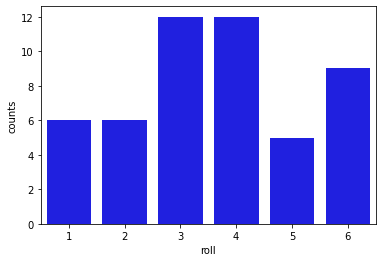

In [18]:
outcomes_fair = np.random.choice(np.arange(1,7), size = 50)
unique, counts = np.unique(outcomes_fair, return_counts=True)

df = pd.DataFrame({"roll":unique,
                 "counts":counts})

sns.barplot(x="roll",
             y="counts",
           data=df,
           color = "blue")

# unique.tostring()

<AxesSubplot:xlabel='roll', ylabel='counts'>

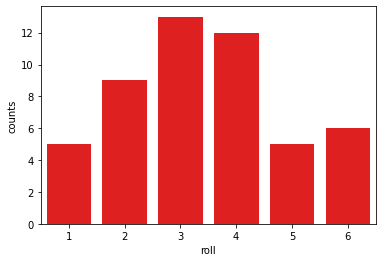

In [19]:
p_loaded = np.array([1/12,1/12,1/3,1/3,1/12,1/12])

outcomes_loaded = np.random.choice(np.arange(1,7), size = 50, p = p_loaded)
unique, counts = np.unique(outcomes_loaded, return_counts=True)

df = pd.DataFrame({"roll":unique,
                 "counts":counts})

sns.barplot(x="roll",
             y="counts",
           data=df,
           color = "red")

In [20]:
p_loaded = np.array([1/12,1/12,1/3,1/3,1/12,1/12])

outcomes = np.random.choice(np.arange(1,7), size = 50000, p= p_loaded)

unique, counts = np.unique(outcomes, return_counts=True)

<AxesSubplot:>

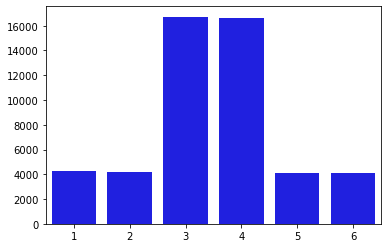

In [21]:
sns.barplot(np.arange(1,7),
           counts,
           color= 'blue')

What does one see? For the fair die, the rolls appear to be evenly spread out among the six possible numbers. In contrast, the rolls for the loaded die tend to concentrate on the values and 3 and 4, and the remaining numbers were less likely to occur.

Can one compute a summary value to contrast the probability distributions for the fair and loaded dice? One summary number for a random variable has already been discussed, the mean $\mu$. This number represents the average outcome for the random variable when one performs the experiment many times.

Suppose the mean is computed for each of the two probability distributions. For the fair die, the mean is given by

$$ \mu_{FairDie} = (1)(\frac{1}{6}) + (2)(\frac{1}{6}) + (3)(\frac{1}{6}) + (4)(\frac{1}{6}) + (5)(\frac{1}{6}) + (6)(\frac{1}{6}) = 3.5$$

In [22]:
(np.array([1/6 for _ in np.arange(0,6)])*np.arange(1,7)).sum()

3.5

And for the loaded die the mean is given by:

$$ \mu_{LoadedDie} = (1)(\frac{1}{12}) + (2)(\frac{1}{12}) + (3)(\frac{1}{3}) + (4)(\frac{1}{3}) + (5)(\frac{1}{12}) + (6)(\frac{1}{12}) = 3.5$$

In [23]:
(p_loaded*np.arange(1,7)).sum()

3.4999999999999996

The means of the two probability distributions are the same – this means that one will tend to get the same average roll when the fair die and the loaded die are rolled many times.

But one knows from our rolling data that the two probability distributions are different. For the loaded die, it is more likely to roll 3’s or 4’s. In other words, for the loaded die, it is more likely to roll a number close to the mean
value $\mu = 3.5$. The standard deviation of a random variable $X$, denoted by the Greek letter $\sigma$, measures how close the random variable is to the mean $\mu$. It is called a **standard deviation** since it represents an "average" (or standard) distance (or deviation) from the mean $\mu$. This standard deviation, denoted $\sigma$ is defined as follows:

$$ \sigma = \sqrt{\sum_{x}(x-\mu)^{2}P(X=x)} $$

To find the standard deviation $\sigma$ for a random variable, one first computes (for all values of $X$) the difference (or deviation) of $x$ from the mean value $\mu$. Next, one squares each of the differences, and finds the average squared
deviation by multiplying each squared deviation by the corresponding value of the pmf and summing the products. The standard deviation $\sigma$ is the square root of the average squared deviation

In [24]:
# Fair Die  
mu = 3.5
p = np.array([1/6 for _ in np.arange(0,6)])
sigma = np.sqrt((((np.arange(1,7) - mu)**2)*p).sum())

np.round(sigma,2)

1.71

In [25]:
# Loaded Die 
mu = 3.5
p = np.array([1/12,1/12,1/3,1/3,1/12,1/12])
sigma = np.sqrt((((np.arange(1,7) - mu)**2)*p).sum())

np.round(sigma,2)

1.26

It is seen from our calculations that $\sigma_{FairDie} = 1.71$ and $\sigma_{LoadedDie} = 1.26$

What does this mean? Since the loaded die roll has a smaller standard deviation, this means that the roll of the loaded die tends to be closer to the mean ($\mu = 3.5$) than for the fair die. When one rolls the loaded die many times, one will
notice a smaller spread or variation in the rolls than when one rolls the fair die many times.

###### Simulating Rolls of Fair and Loaded Dice

#### Interpreting the standard deviation for a bell-shaped distribution

Once one has computed a standard deviation $\sigma$ for a random variable, how can one use this summary measure? One use of $\sigma$ was illustrated in the dice example above. The probabilities for the roll of the loaded die were more concentrated about the mean than the probabilities for the roll of the fair die, and that resulted in a smaller value of σ for the roll of the loaded die.

The standard deviation has an attractive interpretation when the probability distribution of the random variable is bell-shaped.

When the probability distribution has the following shape:

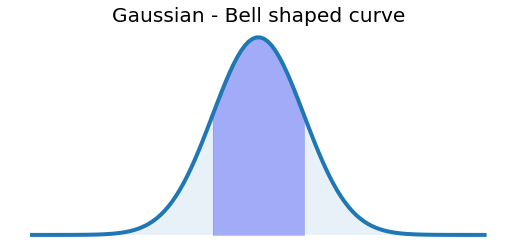

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

mu = 0
sig = 1
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

x_values = np.linspace(-5, 5, 120)

fig, ax = plt.subplots(figsize=(9,4))
plt.style.use('fivethirtyeight')

fill_sig = 1
x_sig = np.linspace(-fill_sig, fill_sig,120)
y = gaussian(x_sig, mu, sig)

ax.fill_between(x_sig,y,0, alpha=0.3, color='b')
ax.fill_between(x_values,gaussian(x_values, mu, sig),0, alpha=0.1)
ax.axis('off')

ax.set_title('Gaussian - Bell shaped curve')
plt.plot(x_values, gaussian(x_values, mu, sig))

plt.show()

then approximately
- the probability that X falls within one standard deviation of the mean is 0.68.
- the probability that X falls within two standard deviations of the mean is 0.95.

Mathematically, one writes,

- $Prob(\mu - \sigma \lt X \lt \mu + \sigma) \approx 0.68$ 
- $Prob(\mu - 2\sigma \lt X \lt \mu + 2\sigma) \approx 0.95$

##### Simulating Rolls of Ten Dice

To illustrate this interpretation of the standard deviation, suppose ten fair dice are rolled and the sum of the numbers appearing on the dice is recorded. It is easy to simulate this experiment in `python` using the following script. The
function `roll10()` will roll 10 dice and sum the outcome, then we use list comprehension to create a `numpy` array containing the outcomes of 1000 trials, and the variable `sum_rolls` rolls contains the sum of the rolls from the experiments.

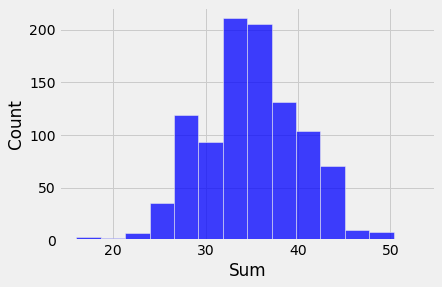

In [27]:
import numpy as np
import seaborn as sns
import pandas as pd

def roll10():
    return(np.random.choice(np.arange(1,7),size=10).sum())

n_rolls = 1000

sum_rolls = np.array([roll10() for _ in np.arange(0,n_rolls)])
df_rolls = pd.DataFrame({'experiment': np.arange(0,n_rolls),
                        'Sum':sum_rolls})

sns.histplot(data = df_rolls,
             x = "Sum",
              bins=14,
            color='blue');

Note that the shape of this histogram is approximately bell shaped about the value $35$. Since this histogram is a reflection of the probability distribution of the sum of the rolls of ten dice, this means that the shape of the probability distribution for the sum will also be bell-shaped.

For this problem, it can be shown (as an end-of-chapter exercise) that the mean and standard deviation for the sum of the rolls of ten fair dice are respectively

$$ \mu = 35, \sigma = 5.4 $$

Applying our rule, the probability that the sum falls between:

- $ \mu - \sigma$ and $ \mu + \sigma$, or $35 - 5.4 = 29.6$ and $35 + 5.4 = 40.4$ is approximately $0.68$
- $ \mu - 2\sigma$ and $ \mu + 2\sigma$, or $35 - 2(5.4) = 24.2$ and $35 + 2(5.4) = 45.8$ is approximately $0.95$


##### Simultating Rolls of Ten Dice (continued)

To see if these are accurate probability computations, return to our simulation of this experiment and see how often the sum of the ten rolls fell within the above limits. Recall that the simulation sums were stored in the vector sum rolls. Below the proportions of sums of ten rolls that fall between 29.6 and 40.4, and between 24.2 and 45.8, are computed.

In [28]:
sum_rolls.mean()

35.008

In [29]:
len(sum_rolls[(sum_rolls > 29.6) & (sum_rolls < 40.4)])/n_rolls

0.678

In [30]:
len(sum_rolls[(sum_rolls > 24.2) & (sum_rolls < 45.8)])/n_rolls

0.964

One sees that the proportions of values that fall within these limits are 0.702 and 0.955, respectively. Since these proportions are close to the numbers 0.68 and 0.95, we see in this example that this rule is pretty accurate

## Coin Tossing Distribution

### Introduction: A Galton Board

Consider the following random experiment. One takes a quarter and flip it ten times, recording the number of heads one gets. There are four special characteristics of this simple coin-tossing experiment.

1. One is doing the same thing (flip the coin) ten times. We will call an individual coin flip a trial, and so our experiment consists of ten **identical trials**.
2. On each trial, there are **two possible outcomes**, heads or tails.
3. In addition, the probability of flipping heads on any trial is 1/2.
4. The **results of different trials are independent**. This means that the probability of heads, say, on the fourth flip, does not depend on what happened on the first three flips.

One is interested in the number of heads one gets – this number will be referred to $X$. In particular, one is interested in the probability of getting five heads, or $Prob(X = 5)$.

In this section, one will see that this binomial probability model applies to many different random phenomena in the real world. Probability computations for the binomial and the closely related negative binomial models will be discussed and the usefulness of these models in representing the variation in real-life experiments will be illustrated.

#### Binomial probabilities

Let’s return to our experiment where a quarter is flipped ten times, recording X, the number of heads. One is interested in the probability of flipping exactly five heads, that is, Prob(X = 5). To compute this probability, one first has to think of possible outcomes in this experiment. Suppose one records if each flip is heads (H) or tails (T). Then one possible outcome with ten flips is

|      |   |   |   |   |   |   |   |   |   |    |
| ---- | - | - | - | - | - | - | - | - | - | -- |  
|Trial | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
|Result| H | H | T | T | H | T | T | H | H | T |

Another possible outcome is $TTHHTHTHHH$. The sample space consists of all possible ordered listings of ten letters, where each letter is either an $H$ or a $T$.



In [31]:
# How to compute all possible combination of strings in Python

import itertools
import numpy as np

a1 = np.array([''.join(x) for x in itertools.product('HT', repeat=10)])

In [32]:
t1 = a1[np.char.count(a1,'H') == 5]

Next, consider computing the probability of a single outcome of ten flips such as the HHTTHHTHHT sequence shown above. The probability of this outcome is written as

$$P(\text{"H on toss 1" AND "H on toss 2" AND} \dots \text{AND "T on toss 10"})$$

Using the fact that outcomes on different trials are independent, this probability is written as the product

$$ P(\text{"H on toss 1"}) \times P(\text{"H on toss 2"}) \times \dots \times P(\text{"H on toss 10"}) $$

Since the probability of heads (or tails) on a given trial is 1/2, one has

$$ P(HHTTHHTTHT) = \frac{1}{2} \times \frac{1}{2} \times \dots \times \frac{1}{2} = (\frac{1}{2})^{10}$$

Actually, the probability of any outcome (sequence of ten letters with H’s or T’s) in this experiment is equal to $(\frac{1}{2})^{10} $

Let’s return to our original question – what is the probability that one gets exactly five heads? If one thinks of the individual outcomes of the ten trials, then one will see that there are many ways to get five heads. For example,
one could observe

$$ HHHHHTTTTT \text{ or } HHHHTTTTTH \text{ or } HHHTTTTTHH$$

In each of the three outcomes, note that the number of heads is five. How many outcomes (like the ones shown above) will result in exactly five heads?

As before, label the outcomes of the individual flips by the trial number:

|      |   |   |   |   |   |   |   |   |   |    |
| ---- | - | - | - | - | - | - | - | - | - | -- |  
|Trial | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
|Outcome| - | - | - | - | - | - | - | - | - | - |

If five heads are observed, then one wishes to place five $H$’s in the ten slots above. In the outcome $HHHHHTTTTT$, the heads occur in trials 1, 2, 3, 4, 5, and in the outcome $HHHTTTTTHH$, the heads occur in trials 1, 2, 3, 9,
and 10. If one observes exactly 5  heads, then one must choose five numbers from the possible trial numbers 1, 2, ..., 10 to place the five $H$’s. There are $\binom{5}{10}$ ways of choosing these trial numbers. Note that the order in which one
chooses the trial numbers is not important. Since there are ways of getting exactly five heads, and each outcome has probability $(\frac{1}{2})^{10}$, one sees that

$$ Prob(X = 5) = \binom{5}{10} \left( \frac{1}{2} \right)^{10} = 0.246 $$

From the complement property, one sees that the $Prob(\text{five heads are not tossed}) = 1−0.246 = 0.754$. It is interesting to note that although one expects to get five heads when flipping a coin ten times, it is actually much more likely
not to flip five heads than to flip five heads.

#### Binomial Experiments

Although the coin tossing experiment described above seems pretty artificial, many random experiments share the same basic properties as coin tossing.

Consider the following binomial experiment:

1. One repeats the same basic task or trial many times – let the number of trials be denoted by $n$.
2. On each trial, there are two possible outcomes, which are called "success" or "failure". One could call the two outcomes "black" and "white", or "0" or "1", but they are usually called `success` and `failure`.
3. The probability of a success, denoted by $p$, is the same for each trial.
4. The results of outcomes from different trials are independent. Here are some examples of binomial experiments.

Here are some examples of binomial experiments.

**Example: A sample survey.** Suppose the Gallup organization is interested in estimating the proportion of adults in the United States who use the popular auction website eBay. They take a random sample of 100 adults and 45 say that they use eBay. In this story, we see that

1. The results of this survey can be considered to be a sequence of 100 trials where one trial is asking a particular adult if he or she uses eBay.
2. There are two possible responses to the survey question – either the adult says "yes" (he or she uses eBay) or "no" (he or she doesn’t use eBay).
3. Suppose the proportion of all adults that use eBay is $p$. Then the probability that the adult says "yes" will be $p$.
4. If the sampling is done randomly, then the chance that one person says "yes" will not depend on the answers of the people who were previously asked. This means that the responses of different adults to the question can be regarded as independent events.

**Example: A baseball hitter’s performance during a game.** Suppose you are going to a baseball game and your favorite player comes to bat five times during the game. This particular player is a pretty good hitter and his batting average is about 0.300. You are interested in the number of hits he will get in the game. This can also be considered a binomial experiment:

1. The player will come to bat five times – these five at-bats can be considered the five trials of the experiment (n = 5).
2. At each at-bat, there are two outcomes of interest – either the player gets a hit or he doesn’t get a hit.
3. Since the player’s batting average is 0.300, the probability that he will get a hit in a single at-bat is p = 0.300.
4. It is reasonable to assume that the results of the different at-bats are independent. That means that the chance that the player will get a hit in his fifth at-bat will be unrelated to his performance in the first four at-bats. We note that this is a debatable assumption, especially if you believe that a player can have a hot-hand.

**Example: Sampling without replacement.** Suppose a committee of four will be chosen at random from a group of five women and five men. You are interested in the number of women that will be in the committee. Is this a binomial experiment?

1. If one thinks of selecting this committee one person at a time, then one can think this experiment as four trials (corresponding to selecting the four people).
2. On each trial, there are two possible outcomes – either one selects a woman or a man. At this point, things are looking good – this may be a binomial experiment. But...
3. Is the probability of choosing a woman the same for each trial? For the first pick, the chance of picking a woman is 5/10. But once this first person has been chosen, the probability of choosing a woman is not 5/10 – it will be either 4/9 or 5/9 depending on the outcome of the first trial. So the probability of a “success” is not the same for all trials, so this violates the third property of a binomial experiment.
4. Likewise, in this experiment, the outcomes of the trials are not independent. The probability of choosing a woman on the fourth trial is dependent on who was selected in the first three trials, so again the binomial assumption is violated.

### Binomial computations

A binomial experiment is defined by two numbers

$$ n =  \text{the number of trials} $$
$$ p = \text{probability of a "success" on a single trial} $$

If one recognizes an experiment as being binomial, then all one needs to know is $n$ and $p$ to determine probabilities for the number of successes $X$. Using the same argument as was made in the coin-tossing example, one can show that the probability of $x$ successes in a binomial experiment is given by

$$ P(X = x) = \binom{n}{x}p^{x}(1-p)^{n-x}, k = x \dots, n $$ 

Let’s illustrate using this formula for a few examples.

In [33]:
from scipy.special import binom

def mbinom(n, x, p):
    return(binom(n, x) * p**x * (1-p)**(n-x))

**Example: A baseball hitter’s performance during a game (revisited).** Remember our baseball player with a true batting average of 0.300 is coming to bat five times during a game. What is the probability that he gets exactly two hits? It was shown earlier that this was a binomial experiment. Since the player has five opportunities, the number of trials is $n = 5$. If one regards a success as getting a hit, the probability of success on a single trial is p = 0.3. The random variable $X$ is the number of hits of the player during this game.

Using the formula, the probability of exactly two hits is

$$P(X = 2) = \binom{5}{2}(0.3)^{2}(1-0.3)^{5-2} = 0.3087 $$

In [34]:
np.round(mbinom(5,2,0.3),4)

0.3087

What is the probability that the player gets at least one hit? To do this problem, one first constructs the collection of binomial probabilities for $n = 5$ trials and probability of success $p = 0.3$. Next dataframe shows all possible values of $X$ (0, 1, 2, 3, 4, 5) and the associated probabilities found using the binomial formula.

In [35]:
df = pd.DataFrame({ 'x': np.arange(0,6),
    'P(X = x)':np.array([np.round(mbinom(5,i,0.3),4) for i in np.arange(0,6)])})

df.set_index('x', inplace=True)
np.round(df,3)

,P(X = x)
x,
0,0.168
1,0.360
2,0.309
3,0.132
4,0.028
5,0.002


One is interested in the probability that the player gets at least one hit or $P(X \geq 1)$. "At least one hit" means that X can be 1, 2, 3, 4 or 5. To find this one simply sums the probabilities of $X$ between 1 and 5:

$$P(X \geq 1) = P(X = 1,2,3,4,5) = 0.360+0.309+0.132+0.029+0.002 = 0.832 $$.

In [36]:
np.round(df.iloc[1:6]['P(X = x)'].sum(),3)

0.832

There is a simpler way of doing this computation using the complement property of probability. We note that if the player does not get at least one hit, then he was hitless in the game (that is, $X = 0$). Using the complement property

$$P(X \geq 1) = 1 − P(X = 0) = 1 − 0.168 = 0.832$$.

##### Binomial Calculations

By use of the `binom.pmf()` and `binom.cdf` functions in `scipy.stats` library, one can perform probability calculations for any binomial distribution. In our baseball example the number of hits $X$ is binomial with sample size 5 and probability of success $p = 0.3$. In the following python script a data frame is constructed with the possible values of the number of hits x, and the function dbinom() with arguments size and prob used to compute the binomial probabilities:

In [37]:
# pmf stands for probability mass function

from scipy.stats import binom
import numpy as np
import pandas as pd

df = pd.DataFrame({'x':np.arange(0,6),
                   'P(x = X)':np.round(binom.pmf(np.arange(0,6), n = 5,p = 0.3),3)}).set_index('x')

df

,P(x = X)
x,
0,0.168
1,0.360
2,0.309
3,0.132
4,0.028
5,0.002


In [38]:
# cdf stands for cumulative density function

np.round(binom.cdf(2, n =5, p=0.3),5)

0.83692

One computes the probability $P(X \geq 2)$ by finding the cumulative probability $P(X \leq 1)$, and subtracting the result from 1:

In [39]:
np.round(1 - binom.cdf(1, n =5, p = 0.3), 5)

0.47178

###### Simulating Binomial Experiments 

One conveniently simulates outcomes from binomial experiments by use of the `binom.rvs` function from `scipy.stats` library. The arguments to this function are the number of simulated draws `n`, the number of binomial trials `size` and the probability of success `p`. To illustrate, consider the baseball hitter who is coming to bat 5 times in a game where the probability of a hit on each at-bat is 0.3. One simulates the number of hits in 50 games by using arguments 50, size = 5 and prob = 0.3.

In [40]:
from scipy.stats import binom

# setting the seed 
np.random.seed(seed=1234)
# rvs stands for random variates sample
hits = binom.rvs(n=5, p = 0.3, size=50)

val, n = np.unique(hits, return_counts=True)
df_hits = pd.DataFrame({'hits':val,
            'n':n}).set_index('hits')

df_hits['Percentage'] = df_hits['n']/df_hits['n'].sum()

In [41]:
df_hits

,n,Percentage
hits,,
0,6,0.12
1,18,0.36
2,19,0.38
3,7,0.14


Here this player got exactly one hit in a game in 15 games,  so the approximate probability that $X = 1$ is equal to $18/50 = 0.36$

### Mean and standard deviation of a binomial

There are simple formulas for the mean and variance for a binomial random variable. First let $X_1$ denote the result of the first binomial trial where

$$X_{1}=\left\{
                \begin{array}{ll}
                  1 \text{ if we observe a success}\\
                  0 \text{ if we observe a failure}\\
                \end{array}
              \right.
$$

In the end-of-chapter exercises, the reader will be asked to show that the mean and variance of $X_{1}$ are given by

$$ E(X_{1}) = p$$ 
$$Var(X_{1})=p(1-p)$$

If $X_{1}, \dots, X_{n}$ represent the results of the $n$ binomial trials, then the binomial random variable $X$ can be written as

$$X = X_{1}, \dots, X_{n}$$

Using this representation, the mean and variance of $X$ are given by

$$E(X)= E(X_{1}) + \dots + E(X_{n})$$,
$$Var(X)= Var(X_{1}) + \dots + Var(X_{n})$$

The result about the variance is a consequence of the fact that the results of different trials of a binomial experiment are independent. Using this result and the previous result on the mean and variance of an individual trial outcome, we obtain

$$E(X) = p + \dots + p = np$$,
and
$$ Var(X)= p(1-p) + \dots + p(1-p) = np(1-p)$$


To illustrate these formulas, recall the first example where $X$ denoted the number of heads when a fair coin is flipped 10 times. Here the number of trials and probability of success are given by n = 10 and p = 0.5. The expected number of heads would be

$$E(X) = 10(0.5) = 5$$

and the variance of the number of heads would be

$$V(X) = 10(0.5)(1-0.5) = 2.5 $$

##### Simulating Binomial Experiments (continued)

In our baseball example, the number of successes X were simulated in 50 binomial experiments where $n = 5$ and p = $0.3$. The mean and standard deviation of $X$ are given by $\mu = 5(0.3) = 1.5$ and $\sigma = \sqrt{5(.3)(1 − .3)} = 1.02$. One approximates the mean and standard deviation by finding the sample mean and standard deviation from the simulated values of $X$. Below one sees that these approximate values agree closely with the exact values of $\mu$ and $\sigma$

In [42]:
from scipy.stats import binom
import numpy as np
import pandas as pd

np.random.seed(seed=1234)
# rvs stands for random variates sample
hits = binom.rvs(n=5, p = 0.3, size=50)

In [43]:
hits.mean()

1.54

In [44]:
np.round(hits.std(),4)

0.8766

### Negative binomial experiment

The 2004 baseball season was exciting since particular players had the opportunity to break single-season records. Let’s focus on Ichiro Suzuki of the Seattle Mariners who had the opportunity to break the season record for the most hits that was set by George Sisler in 1920. Sisler’s record was 257 hits and Suzuki had 255 hits before the Mariners’ game on September 30. Was it likely that Suzuki would tie Sisler’s record during this particular game?

Again, one can approximate this process as a coin-tossing experiment. When Suzuki comes to bat, there are two relevant outcomes: either he will get a hit, or he will get an out. Note that other batting plays such as a walk or sacrifice bunt that don’t result in a hit or an out are ignored.  Assume the probability that he gets a hit on a single at-bat is $p = 0.372$ (his 2004 batting average) and one assumes (for simplicity) that the outcomes on different at-bats are independent.

Suzuki needs two more hits to tie the record. How many at-bats will it take him to get two hits? This is not a binomial experiment since the number of trials is not fixed. Instead the number of successes (hits) is fixed in advance and the number of
trials to achieve this is random. Consider

$$ Y = \text{number of at-bats to get two hits} $$ 
One is interested in probabilities about the number of bats $Y$. 

It should be obvious that $Y$ has be at least 2 (he needs at least 2 at-bats to get 2 hits), but $Y$ could be 3, 4, 5, etc. Let’s find the probability that $Y = 5$.

First we know that the second hit must have occurred in the fifth trial (since $Y =5$). Also it is known that there must have been one hit and three outs in the first four trials – there are $\binom{4}{1}$ ways of arranging the $H$'s and the $0$'s in these trials.

Also the probability of each possible outcome is $p^{2}(1−p)^{3}$, where $p$ is the probability of a hit. So the probability that it takes 5 trials to observe 2 hits is

$$ P(Y=5)=\binom{4}{1}p^{2}(1-p)^{3}$$

since $p=0.372$ in this case, we get

$$ P(Y=5)=\binom{4}{1}0.372^{2}(1-0.372)^{3} = 0.1371$$

A general negative binomial experiment is described as follows:

- One has a sequence of independent trials where each trial can be a success ($S$) or a failure.
- The probability of a success on a single trial is $p$.
- The experiment is continued until one observes $r$ successes, and $Y = \text{number of trials one observes}$.

The probability that it takes y trials to observe r successes is

$$P(Y=y)= \binom{y-1}{r-1}p^{r}(1-p)^{y-r}, y = r, r+1, r+2, \dots$$

Let’s use this formula in our baseball example where r = 2 and p = 0.372

In [45]:
from scipy.special import binom

def m_neg_binom(y, r, p):
    return(binom(y-1, r-1) * p**r * (1-p)**(y-r))

In [46]:
import pandas as pd
y = np.arange(2,10)

df = pd.DataFrame({'y': y,
                   'P(Y = y)':  np.round(m_neg_binom(y = y, r = 2,p = 0.372),4)}).set_index('y')

df

,P(Y = y)
y,
2,0.1384
3,0.1738
4,0.1637
5,0.1371
6,0.1076
7,0.0811
8,0.0594
9,0.0426


In [47]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nbinom.html
# 

from scipy.stats import nbinom
import numpy as np
import pandas as pd

df = pd.DataFrame({'y': np.arange(2,10),
                   'P(Y = y)': np.round(nbinom.pmf(k = np.arange(0,8), n = 2,p = 0.372),4)}).set_index('y')
                  
df

,P(Y = y)
y,
2,0.1384
3,0.1738
4,0.1637
5,0.1371
6,0.1076
7,0.0811
8,0.0594
9,0.0426


Note that it is most likely that Suzuki will only need three at-bats to get his two additional hits, but the probability of three at-bats is only 17%. Actually each of the values 2, 3, 4, 5, and 6 have probabilities exceeding 10%.

There is a significant probability that Suzuki will take a large number of bats – by adding the probabilities in Table 4.11, we see that the probability that $Y$ is at most 9 is 0.904, so the probability that $Y$ exceeds 9 is 1 - 0.904 = 0.096.

In [48]:
round(df.loc[2:]['P(Y = y)'].sum(),3)

0.904

In [49]:
round(1-df.loc[2:]['P(Y = y)'].sum(),3)

0.096

For a negative binomial experiment where $Y$ is the number of trials needed to observe $r$ successes, one can show that the mean value is

$$ E(Y) = \frac{r}{p}$$

For the baseball example, $r = 2$ and $p = 0.372$, so the expected number of at-bats to get two hits would be $E(Y ) = 2/0.372 = 5.4$. It is interesting to note that although $Y = 3$ is the most probable value, Suzuki would average over 5 at-bats to get 2 hits in many repetitions of this random experiment.

###### Negative Binomial Calculations and Simulations

In Python we can use the `nbinom` class from `scipy.stats` package. We can use `nbinom.rvs` and `nbinom.rvs` can be used to compute probabilities and simulate from negative binomial distributions. One small complication is that these functions define the random variable to be the number of failures (instead of the total number of trials) until the $r$-th success.

To illustrate the use of these functions, consider our baseball example where $X$ is the number of at-bats for Suzuki to get $r = 2$ hits where the probability of a hit on a single at-bat is $p = 0.372$. The probability $P(X = 5)$ is the same as the probability $P(Y = 3)$ where $Y$ is the number of failures until the second success. Using the function `nbinom.pmf`, one computes $P(Y = 3)$

In [52]:
from scipy.stats import nbinom
import numpy as np


nbinom.pmf(k = 3, n = 2, p = 0.372)

0.13709600586547202

which is equivalent to the probability that $X = 5$ computed earlier. Also, `nbinom.pmf` can be used to simulate negative binomial experiments. For example, one can simulate the number of failures until the second success for 10 experiments as follows.

In [ ]:
from scipy.stats import nbinom
import numpy as np

# setting the seed 
np.random.seed(seed=1234)

nbinom.rvs(size = 10, n = 2, p = 0.372)

It is interesting to note that Suzuki had 22 outs until the second success for one of these experiments.

##### What I learned in Python from this section

In [ ]:
np.array(['HHHHH', 'THHHT',])

In [ ]:
vectorize_count_revenue(np.array(['HHHHH', 'THHHT',]))

In [ ]:
import numpy as np

a = np.random.choice([0,1], size = 5)

In [ ]:
int_to_coin = lambda i: 'H' if i == 1 else 'T'
int_to_coin_vect = np.vectorize(int_to_coin)

In [ ]:
np.random.choice([0,1], size = 5)

In [ ]:
a = ''.join(int_to_coin_vect(np.random.choice([0,1], size = 5)))
a

In [ ]:
n_games = 10000
outcome = np.array([''.join(int_to_coin_vect(np.random.choice([0,1], size = 5))) for _ in range(n_games)])
gain = vectorize_count_revenue(outcome)

df = pd.DataFrame({'Outcome':outcome,
                  'Gain':gain})

In [ ]:
df['Gain'].sum()

In [ ]:
n_games = 1
n_rep = 10000

res = np.zeros(n_rep)
for i in np.arange(n_rep):
    outcome = np.array([''.join(int_to_coin_vect(np.random.choice([0,1], size = 5))) for _ in range(n_games)])
    # gain = vectorize_count_revenue(outcome)
    #print(outcome)
    res[i] = vectorize_count_revenue(outcome).sum()

#df_game = pd.DataFrame({'Outcome':outcome,
#                       'Gain':gain})

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(np.arange(n_rep), res)

In [ ]:
plt.hist(res, bins=np.arange(res.min(), res.max()+1));

In [ ]:
n_games = 100
n_rep = 100

res = np.zeros(n_rep)
for i in np.arange(n_rep):
    outcome = np.array([''.join(int_to_coin_vect(np.random.choice([0,1], size = 20))) for _ in range(n_games)])
    # gain = vectorize_count_revenue(outcome)
    res[i] = vectorize_count_revenue(outcome).sum()
    
plt.scatter(np.arange(n_rep), res)

In [ ]:
n_games = 1000
n_rep = 100

res = np.zeros(n_rep)
for i in np.arange(n_rep):
    outcome = np.array([''.join(int_to_coin_vect(np.random.choice([0,1], size = 20))) for _ in range(n_games)])
    # gain = vectorize_count_revenue(outcome)
    res[i] = vectorize_count_revenue(outcome).sum()
    
plt.scatter(np.arange(n_rep), res)

In [ ]:
res.mean()

In [ ]:
n_games = 1000
n_rep = 100

res = np.zeros(n_rep)
for i in np.arange(n_rep):
    outcome = np.array([''.join(int_to_coin_vect(np.random.choice([0,1], size = 5))) for _ in range(n_games)])
    # gain = vectorize_count_revenue(outcome)
    res[i] = vectorize_count_revenue(outcome).sum()
    
plt.scatter(np.arange(n_rep), res)

In [ ]:
res.mean()

In [2]:
import pandas as pd
pd.show_versions()

ImportError: Can't determine version for hypothesis